In [1]:
%matplotlib inline
import os
import re
import string
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from collections import Counter
import numpy as np

In [ ]:
sns.set(style="whitegrid")
plt.rcParams['figure.figsize'] = [10.0, 8.0]
plt.rcParams['axes.titlesize'] = 20
plt.rcParams['axes.labelsize'] = 18
plt.rcParams['xtick.labelsize'] = 14
plt.rcParams['ytick.labelsize'] = 14
plt.rcParams['grid.linestyle'] = '-'
plt.rcParams['legend.fontsize'] = 14
colors = [i['color'] for i in plt.rcParams['axes.prop_cycle']]

In [4]:
def get_ref_and_align(filename):
    na = string.ascii_uppercase+'+ '
    with open(filename) as f:
        seqs = []
        alignments = []
        new_ref = ''
        new_align = ''
        for i, line in enumerate(f):
            if not line:
                pass
            elif line[0] == '>':
                if new_ref:
                    seqs.append(new_ref)
                    new_ref == ''
                if new_align:
                    alignments.append(new_align)
#                     alignments.append(new_align)
                    new_ref = ''
                    new_align = ''
            elif line[0:6] == 'Query ' and not seqs:
                new_ref += line.strip().split()[2]
            elif line.count(' ') >= 12 and all(i in na for i in line.strip()):
                new_align += line.rstrip('\n').lstrip(' ')
        alignments.append(new_align)
        seqs.append(alignments)
        return seqs  
    
def find_motif_site(motif, MaCS):#array of HOG components sequences from reference genome
    # Finds all of the Hog1 concensus sites in the ref
    # str.find() only returns the first instance of the site
    return [m.start() for m in re.finditer(motif,MaCS)]

def number_concensus_sites(seqs):
    sp, tp = find_concensus_site(seqs[0])
    ref_num = len(sp+tp)
    align_num = []
    for seq in seqs[1]:
        sp, tp = find_concensus_site(seq)
        num = len(sp+tp)
        align_num.append(num)
    MaCS_hist = plt.hist(align_num)
#     MaCS_hist[0].set_color('r')
#     plt.hist().get_xticklabels()[0].set_color('red') 
    plt.show()
#     return [ref_num,align_num]

# def plot_concensus_sites(seqs):
#     sp, tp = find_concensus_site(seqs[0])
#     plt.bar(sp,[1,1,1],color='g')
#     plt.show()

def compare_concensus_sites(seqs,filename):#array of HOG components sequences from reference genome
    # Finds all of the Hog1 concensus sites in the ref
    # str.find() only returns the first instance of the site
#     for x in seqs:
#         print(x)
#         _ref = [m.start() for m in re.finditer('SP', x)]
#         print(_ref)
    ref_sp, ref_tp = find_concensus_site(seqs[0])
    if ref_sp or ref_tp:
#     ref['ID'] = 'ref'
        sps = []
        tps = []
        for seq in seqs[1]:
            seq_sp, seq_tp = find_concensus_site(seq)
    #         seq['ID'] = str(i)
            sps += seq_sp
            tps += seq_tp
    #     print(sps)
        plt.clf()
        plt.rcParams['figure.figsize'] = [20.0, 8.0]
        if sps:
            sp_labels, sp_count = zip(*Counter(sps).items())
            plt.bar(sp_labels, sp_count, width=1, color = 'g', label='SP')
        if tps:
            tp_labels, tp_count = zip(*Counter(tps).items())
            plt.bar(tp_labels, tp_count, width=1, color='b', label='TP')
    #     print(sp_count)
    #     indices = np.arange(len(labels))
        plt.axhline(y=len(seqs[1]),color='r', linestyle='--', label='Total number of sequences analyzed')
        plt.legend(bbox_to_anchor=[1, 0.5], loc='center left')
        plt.xlim(0,len(seqs[0]))
        plt.xlabel('Amino Acid Sequence Position')
        plt.title(filename[0].upper() + filename[1:4])
        plt.ylabel('Number of sequences')
        plt.show()
    else:
        print('Bug in code')
#         ref = ref.append(seq, ignore_index=True)
#     _aligns = [[m.start() for m in re.finditer('SP', seqs[1])], [m.start() for m in re.finditer('TP', seqs[1])]]
#     return [m.start() for m in re.finditer('SP',seqs)], [m.start() for m in re.finditer('TP',seqs)] 
#     print(ref)
#     sns.barplot(x='locations', y)
#     return ref, seq

def plot_seq_MCS(seqs,filename):
    seqs = [seqs[0]] + seqs[1]
    grid =[]
    for x in seqs:
        temp = []
        for i in range(len(x)-1):
        #     print(x[i:i+2])
            if x[i:i+2] == 'SP':
                temp.append(2)
            elif x[i:i+2] == 'TP':
                temp.append(1)
            else:
                temp.append(0)
        grid.append(temp)
    colors = ['#DCDCDC','#ee9537','#3db7d6']
    grid_df = pd.DataFrame(grid)
    
    plt.clf()
    plt.rcParams['figure.figsize'] = [30.0, 20.0]
    sns.heatmap(grid_df, cmap=colors, cbar=False)
    plt.title(filename[0].upper() + filename[1:4]) #add percent conserved
    plt.xlabel('Amino Acid Sequence Position')
    plt.ylabel('Sequence number') # change to strain name!
    plt.show()
    
def get_MaCS_df(seq):
    refs_sp = [m.start() for m in re.finditer('SP', seq)]
    refs_tp = [m.start() for m in re.finditer('TP', seq)]
    _refs_locs = refs_sp + refs_tp
    _ = {'locations': _refs_locs, 'type': ['SP' for x in range(len(refs_sp))] + ['TP' for x in range(len(refs_tp))]}
    df = pd.DataFrame.from_dict(_)
    return df

# Amy

In [15]:
pbs2 = get_ref_and_align('/Users/AmyAllen/Documents/A-pipeline-for-fast-conserved-protein-motif-identification/aligned_cp_for_counting/trimmed_data/pbs2.txt')
pbs2[0] #first sequence in list of lists

'MEDKFANLSLHEKTGKSSIQLNEQTGSDNGSAVKRTSSTSSHYNNINADLHARVKAFQEQRALKRSASVGSNQSEQDKGSSQSPKHIQQIVNKPLPPLPVAGSSKVSQRMSSQVVQASSKSTLKNVLDNQETQNITDVNINIDTTKITATTIGVNTGLPATDITPSVSNTASATHKAQLLNPNRRAPRRPLSTQHPTRPNVAPHKAPAIINTPKQSLSARRGLKLPPGGMSLKMPTKTAQQPQQFAPSPSNKKHIETLSNSKVVEGKRSNPGSLINGVQSTSTSSSTEGPHDTVGTTPRTGNSNNSSNSGSSGGGGLFANFSKYVDIKSGSLNFAGKLSLSSKGIDFSNGSSSRITLDELEFLDELGHGNYGNVSKVLHKPTNVIMATKEVRLELDEAKFRQILMELEVLHKCNSPYIVDFYGAFFIEGAVYMCMEYMDGGSLDKIYDESSEIGGIDEPQLAFIANAVIHGLKELKEQHNIIHRDVKPTNILCSANQGTVKLCDFGVSGNLVASLAKTNIGCQSYMAPERIKSLNPDRATYTVQSDIWSLGLSILEMALGRYPYPPETYDNIFSQLSAIVDGPPPRLPSDKFSSDAQDFVSLCLQKIPERRPTYAALTEHPWLVKYRNQDVHMSEYITERLERRNKILRERGENGLSKNVPALHMGGL'

In [17]:
find_motif_site('SP', pbs2[0])

[82, 247, 414]

# Other

In [9]:
#! /bin/env python
"""
Created on Mon Jul  4 13:10:49 2016

"""

class Reader:
    """Fixes any compatibility issues a fasta file might have with this code.

    Parameters
    ----------
    infasta : str (default=None)
        Name of input fasta file to be manipulated
    outfasta : str (default=None)
        location to store extracted data from infasta
    names : iter (default=None)
        Common style names to use in header lines

    Attributes
    ----------
    data : list
        Raw lines of the infasta file
        Note: This is different than the data attribute in other classes

    Examples
    --------
    Putting the sequence on one line instead of breaking it every 80 chars.
    Making sure the whole sequence is capitalized.
    Restructuring the name line to work with GENCODE's naming.
    """

    def __init__(self, infasta=None, outfasta=None, names=None):
        self.infasta = infasta
        self.outfasta = outfasta
        self.names = names

        self.data = None

    def _read_data(self):
        """Sets data to stripped lines from the fasta file
        """
        with open(self.infasta) as infasta:
            self.data = [l.strip() for l in infasta.readlines()]

    def _upper_seq_per_line(self):
        """Sets data to upper case, single line sequences for each header
        """
        new_data = []
        seq = ''
        for i, line in enumerate(self.data):
            if line[0] == '>':
                if seq:
                    new_data.append(seq.upper())
                    seq = ''
                else:
                    assert i == 0, 'There may be a header without a sequence at line {}.'.format(i)
                new_data.append(line)
            else:
                seq += line
        new_data.append(seq.upper())
        self.data = new_data

    def get_lines(self):
        self._read_data()
        self._upper_seq_per_line()
        return self.data

    def get_seqs(self):
        clean_data = self.get_lines()
        seqs = clean_data[1::2]
        return seqs

    def get_headers(self):
        clean_data = self.get_lines()
        headers = clean_data[::2]
        return headers

    def get_data(self, tuples_only=False):
        clean_data = self.get_lines()
        headers = clean_data[::2]
        seqs = clean_data[1::2]
        tuples = list(zip(headers, seqs))
        if tuples_only:
            return tuples
        else:
            return tuples, headers, seqs

    def supply_basic_header(self):
        """Convert headerlines to GENCODE format with only common name and length"""
        new_fasta = []

        if self.names is None:
            self.names = iter(self.get_headers())
        for i, line in enumerate(self.data):
            if line[0] =='>':
                name = next(self.names).strip('>')
                length = len(self.data[i+1])
                new_fasta.append('>||||{}||{}|'.format(name, length))
            else:
                new_fasta.append(line)
        return new_fasta

    def save(self):
        """Write self.data to a new fasta file"""
        with open(self.outfasta, 'w') as outfasta:
            for line in self.data:
                outfasta.write(line+'\n')


In [10]:
sho1 = Reader('protein_seqs/sho1.fa','test_sho1.fa','sho1')

In [11]:
len(sho1.get_seqs())

94

In [641]:
directory = 'C:/Users/sksuzuki/Documents/Research/Thesis/hog1_consensus_site_muts/aligned_cp_for_counting/trimmed_data/'
for filename in os.listdir(directory):
    if filename.endswith(".txt"): 
        print(os.path.join(directory, filename))
        continue
    else:
        continue

C:/Users/sksuzuki/Documents/Research/Thesis/hog1_consensus_site_muts/aligned_cp_for_counting/trimmed_data/cdc42_trimmed.txt
C:/Users/sksuzuki/Documents/Research/Thesis/hog1_consensus_site_muts/aligned_cp_for_counting/trimmed_data/cla4_trimmed.txt
C:/Users/sksuzuki/Documents/Research/Thesis/hog1_consensus_site_muts/aligned_cp_for_counting/trimmed_data/hkr1.txt
C:/Users/sksuzuki/Documents/Research/Thesis/hog1_consensus_site_muts/aligned_cp_for_counting/trimmed_data/hog1_trimmed.txt
C:/Users/sksuzuki/Documents/Research/Thesis/hog1_consensus_site_muts/aligned_cp_for_counting/trimmed_data/hot1.txt
C:/Users/sksuzuki/Documents/Research/Thesis/hog1_consensus_site_muts/aligned_cp_for_counting/trimmed_data/msb2.txt
C:/Users/sksuzuki/Documents/Research/Thesis/hog1_consensus_site_muts/aligned_cp_for_counting/trimmed_data/msn2.txt
C:/Users/sksuzuki/Documents/Research/Thesis/hog1_consensus_site_muts/aligned_cp_for_counting/trimmed_data/msn4.txt
C:/Users/sksuzuki/Documents/Research/Thesis/hog1_consen

In [26]:
test_filename = 'C:/Users/sksuzuki/Documents/Research/Thesis/hog1_consensus_site_muts/aligned_cp_for_counting/trimmed_data/sln1.txt'

In [27]:
# # REFERENCE SEQUENCES

# def get_ref_seq(filename):
#     with open(filename) as f:
#         ref_seq = []
#         idx = []
#         for i, line in enumerate(f):
#             line = line.strip()#.split()
#     #         print(i, line)
#             if not line:
#                 pass
#             elif line[0:6] == 'Query ':
#                 idx.append(i)
#                 if (i - idx[0]) % 4 == 0:
#                     ref_seq.append(line.split()[2])
#                 else: 
#                     return "".join(ref_seq)
# #         return(idx)       
# ref_seq = get_ref_seq(filename) 
# print(ref_seq)


In [28]:
# def get_first_seq_position(filename):
#     with open(filename) as f:
#         for i, line in enumerate(f):
#             line = line.strip()
#             if not line:
#                 pass
#             elif line[0] == '>':
#                 return i
                
# start = get_first_seq_position(filename)

In [14]:
def number_concensus_sites(seqs):
    sp, tp = find_concensus_site(seqs[0])
    ref_num = len(sp+tp)
    align_num = []
    for seq in seqs[1]:
        sp, tp = find_concensus_site(seq)
        num = len(sp+tp)
        align_num.append(num)
    MaCS_hist = plt.hist(align_num)
#     MaCS_hist[0].set_color('r')
#     plt.hist().get_xticklabels()[0].set_color('red') 
    plt.show()
#     return [ref_num,align_num]

# def plot_concensus_sites(seqs):
#     sp, tp = find_concensus_site(seqs[0])
#     plt.bar(sp,[1,1,1],color='g')
#     plt.show()

def compare_concensus_sites(seqs,filename):#array of HOG components sequences from reference genome
    # Finds all of the Hog1 concensus sites in the ref
    # str.find() only returns the first instance of the site
#     for x in seqs:
#         print(x)
#         _ref = [m.start() for m in re.finditer('SP', x)]
#         print(_ref)
    ref_sp, ref_tp = find_concensus_site(seqs[0])
    if ref_sp or ref_tp:
#     ref['ID'] = 'ref'
        sps = []
        tps = []
        for seq in seqs[1]:
            seq_sp, seq_tp = find_concensus_site(seq)
    #         seq['ID'] = str(i)
            sps += seq_sp
            tps += seq_tp
    #     print(sps)
        plt.clf()
        plt.rcParams['figure.figsize'] = [20.0, 8.0]
        if sps:
            sp_labels, sp_count = zip(*Counter(sps).items())
            plt.bar(sp_labels, sp_count, width=1, color = 'g', label='SP')
        if tps:
            tp_labels, tp_count = zip(*Counter(tps).items())
            plt.bar(tp_labels, tp_count, width=1, color='b', label='TP')
    #     print(sp_count)
    #     indices = np.arange(len(labels))
        plt.axhline(y=len(seqs[1]),color='r', linestyle='--', label='Total number of sequences analyzed')
        plt.legend(bbox_to_anchor=[1, 0.5], loc='center left')
        plt.xlim(0,len(seqs[0]))
        plt.xlabel('Amino Acid Sequence Position')
        plt.title(filename[0].upper() + filename[1:4])
        plt.ylabel('Number of sequences')
        plt.show()
    else:
        print('Bug in code')
#         ref = ref.append(seq, ignore_index=True)
#     _aligns = [[m.start() for m in re.finditer('SP', seqs[1])], [m.start() for m in re.finditer('TP', seqs[1])]]
#     return [m.start() for m in re.finditer('SP',seqs)], [m.start() for m in re.finditer('TP',seqs)] 
#     print(ref)
#     sns.barplot(x='locations', y)
#     return ref, seq

def plot_seq_MCS(seqs,filename):
    seqs = [seqs[0]] + seqs[1]
    grid =[]
    for x in seqs:
        temp = []
        for i in range(len(x)-1):
        #     print(x[i:i+2])
            if x[i:i+2] == 'SP':
                temp.append(2)
            elif x[i:i+2] == 'TP':
                temp.append(1)
            else:
                temp.append(0)
        grid.append(temp)
    colors = ['#DCDCDC','#ee9537','#3db7d6']
    grid_df = pd.DataFrame(grid)
    
    plt.clf()
    plt.rcParams['figure.figsize'] = [30.0, 20.0]
    sns.heatmap(grid_df, cmap=colors, cbar=False)
    plt.title(filename[0].upper() + filename[1:4]) #add percent conserved
    plt.xlabel('Amino Acid Sequence Position')
    plt.ylabel('Sequence number') # change to strain name!
    plt.show()
    
def get_MaCS_df(seq):
    refs_sp = [m.start() for m in re.finditer('SP', seq)]
    refs_tp = [m.start() for m in re.finditer('TP', seq)]
    _refs_locs = refs_sp + refs_tp
    _ = {'locations': _refs_locs, 'type': ['SP' for x in range(len(refs_sp))] + ['TP' for x in range(len(refs_tp))]}
    df = pd.DataFrame.from_dict(_)
    return df

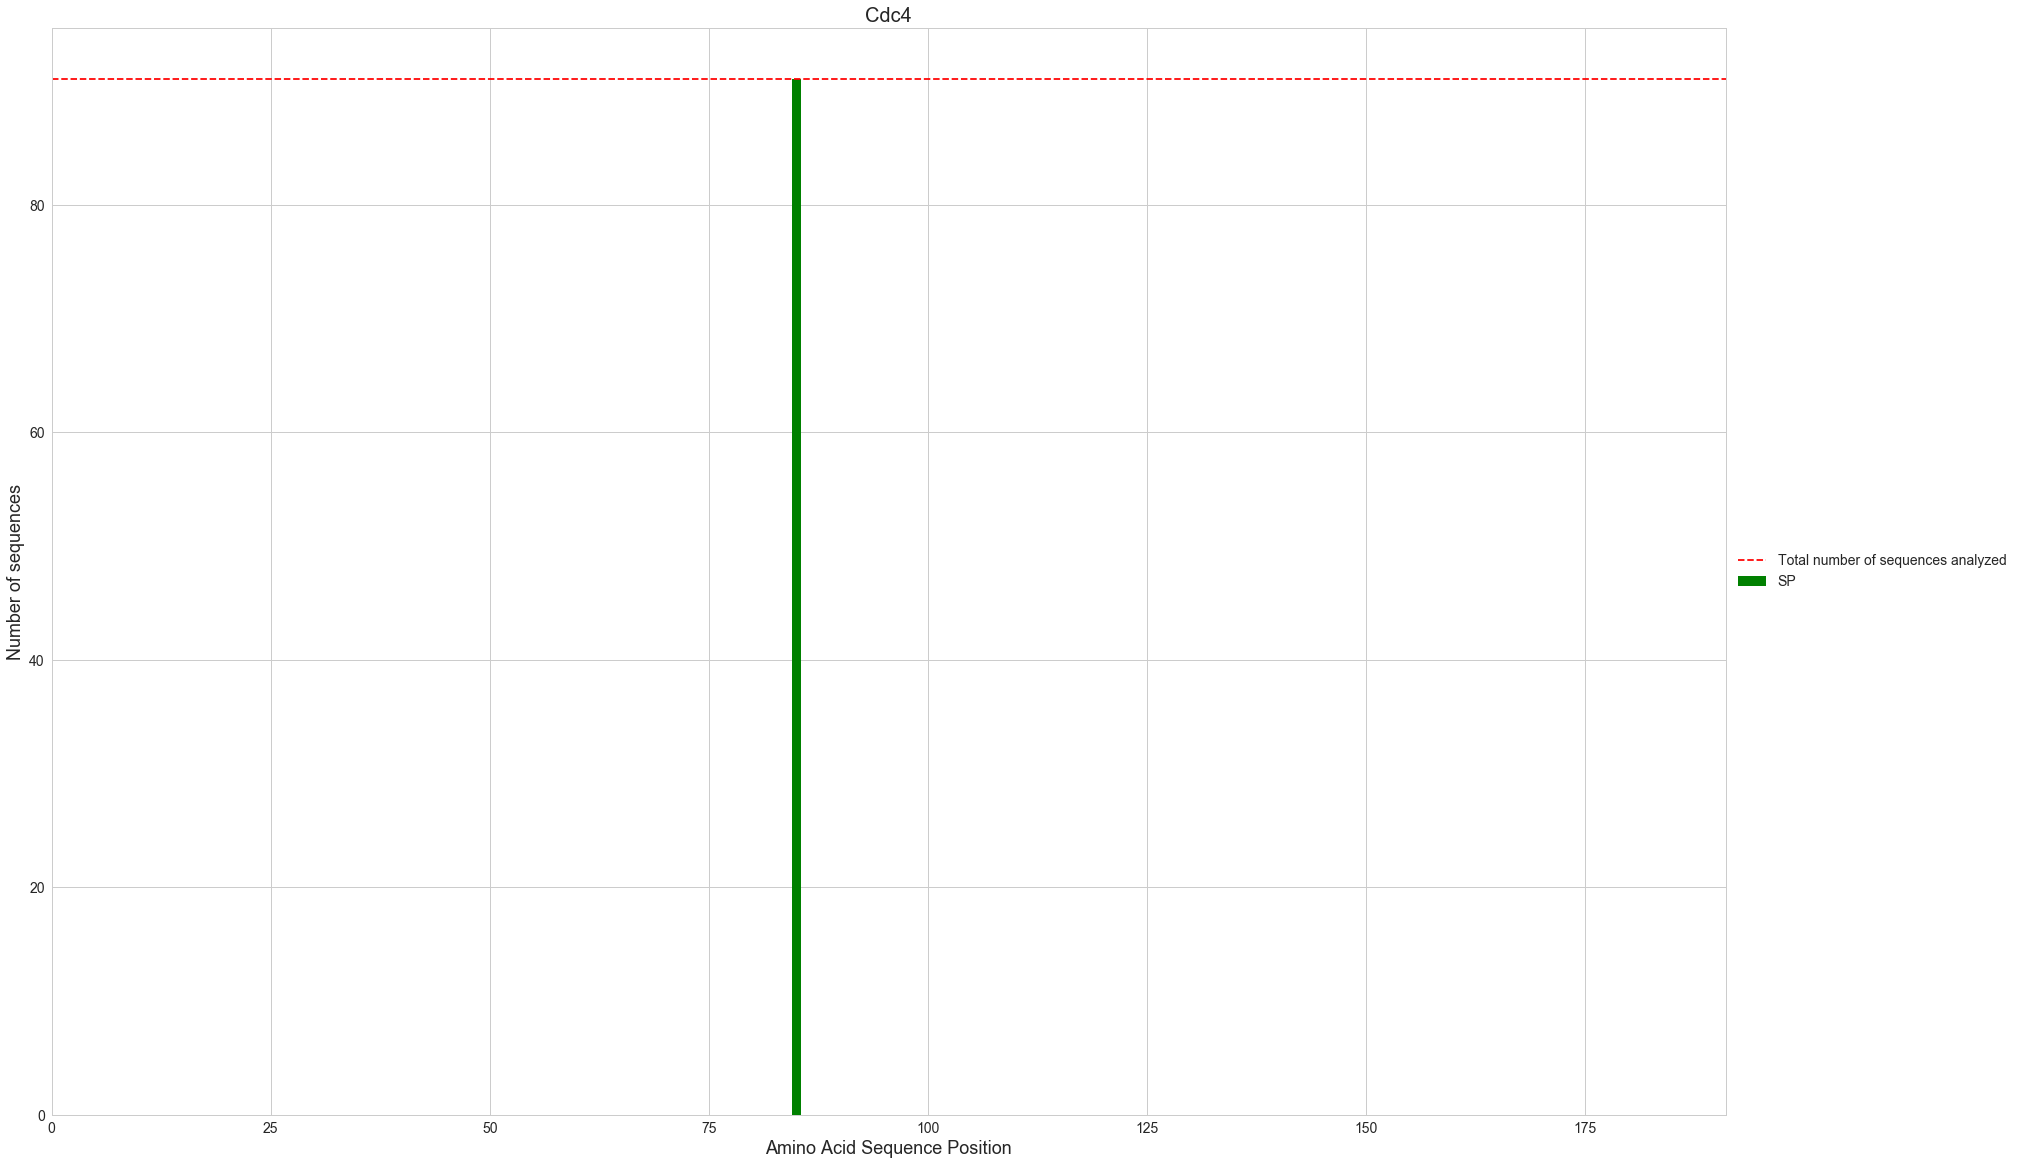

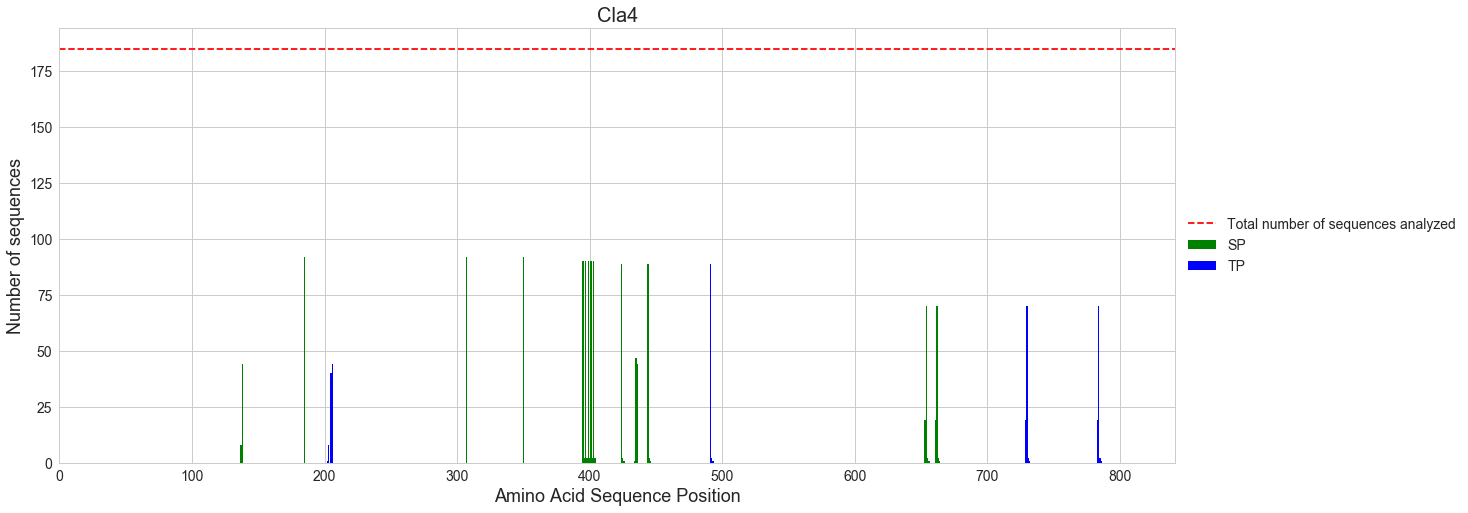

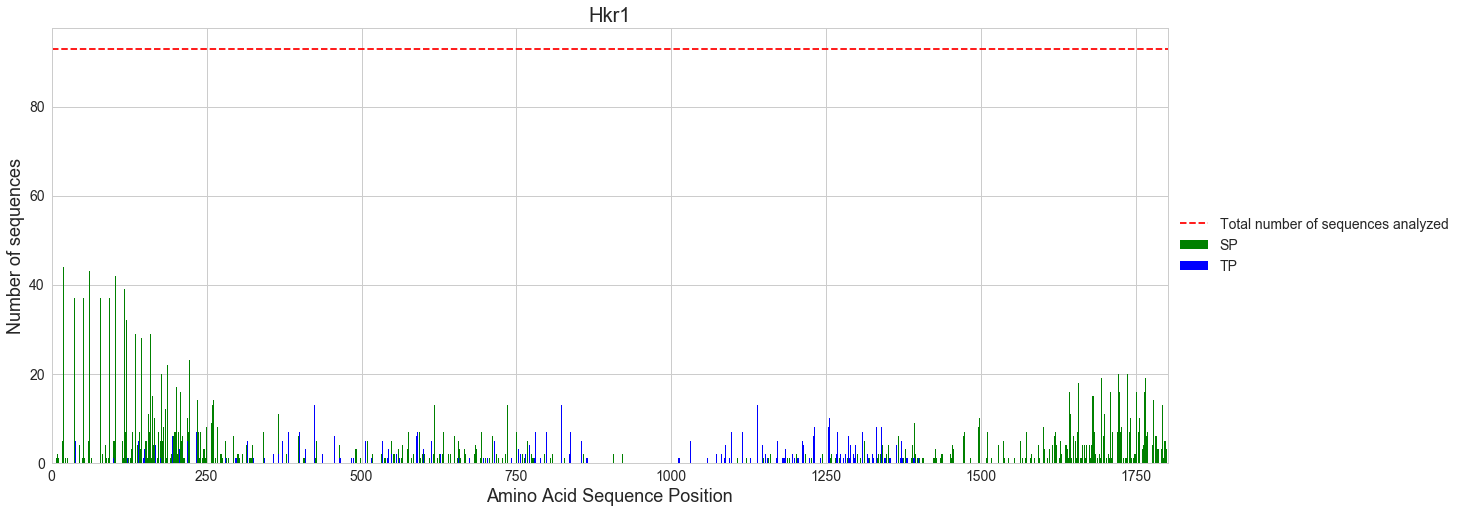

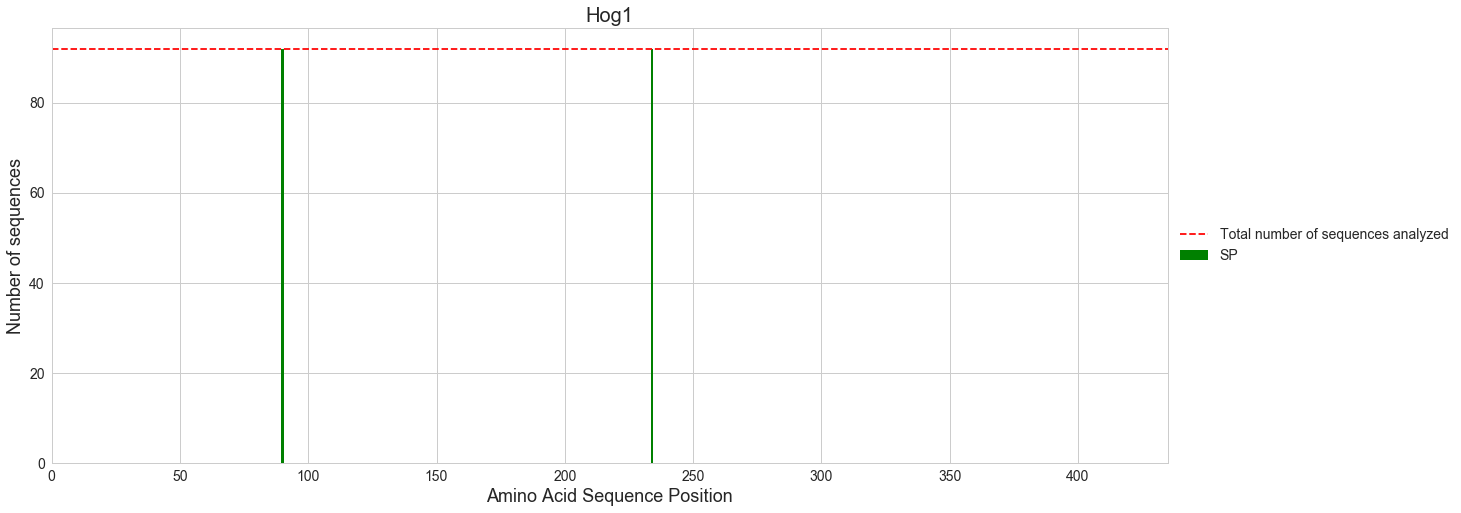

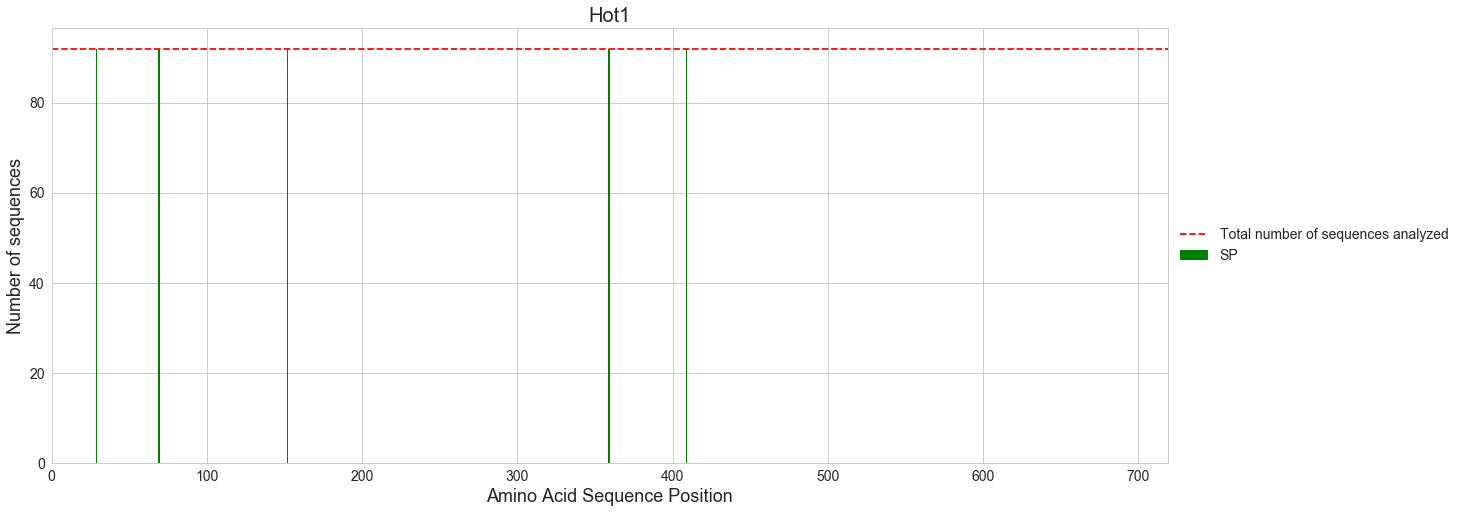

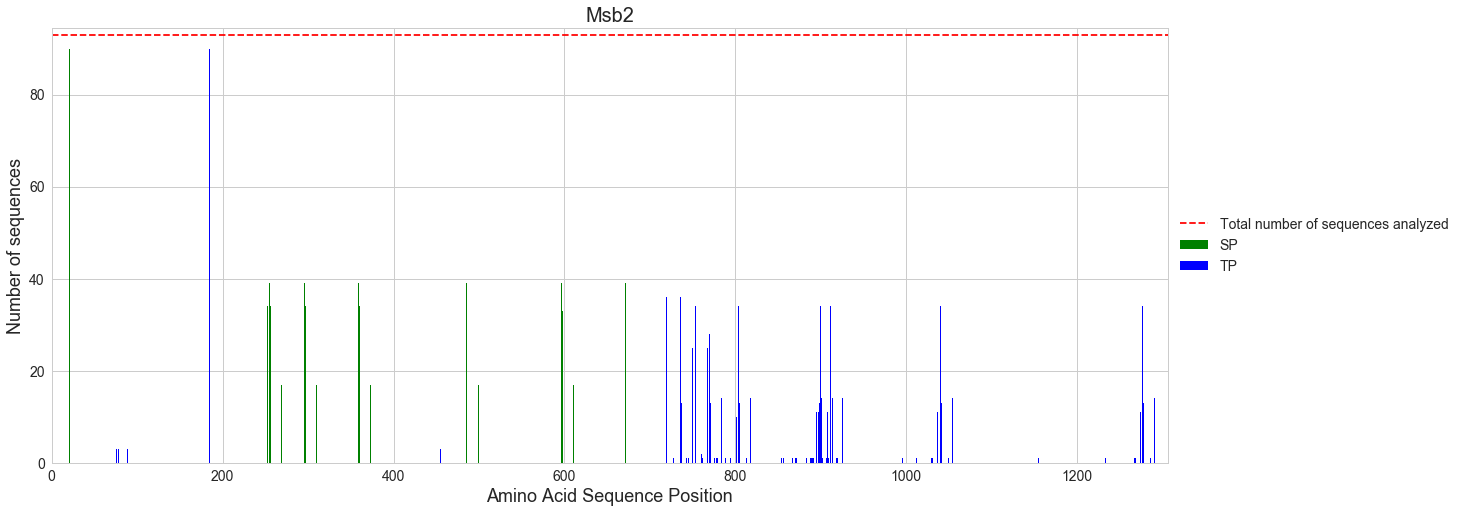

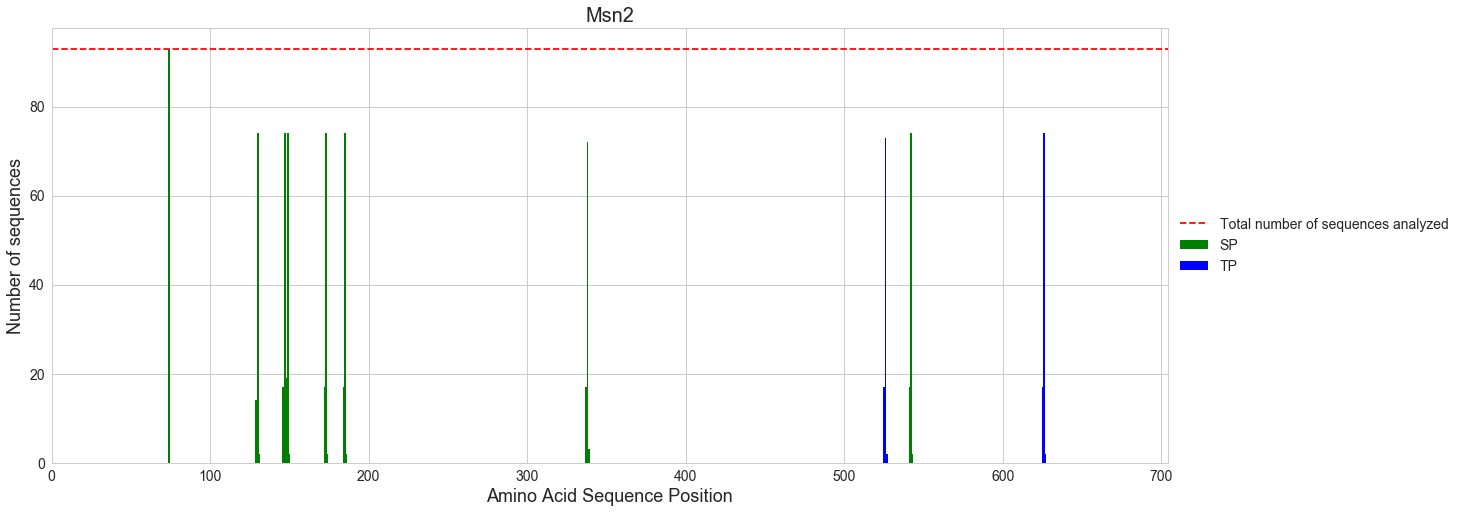

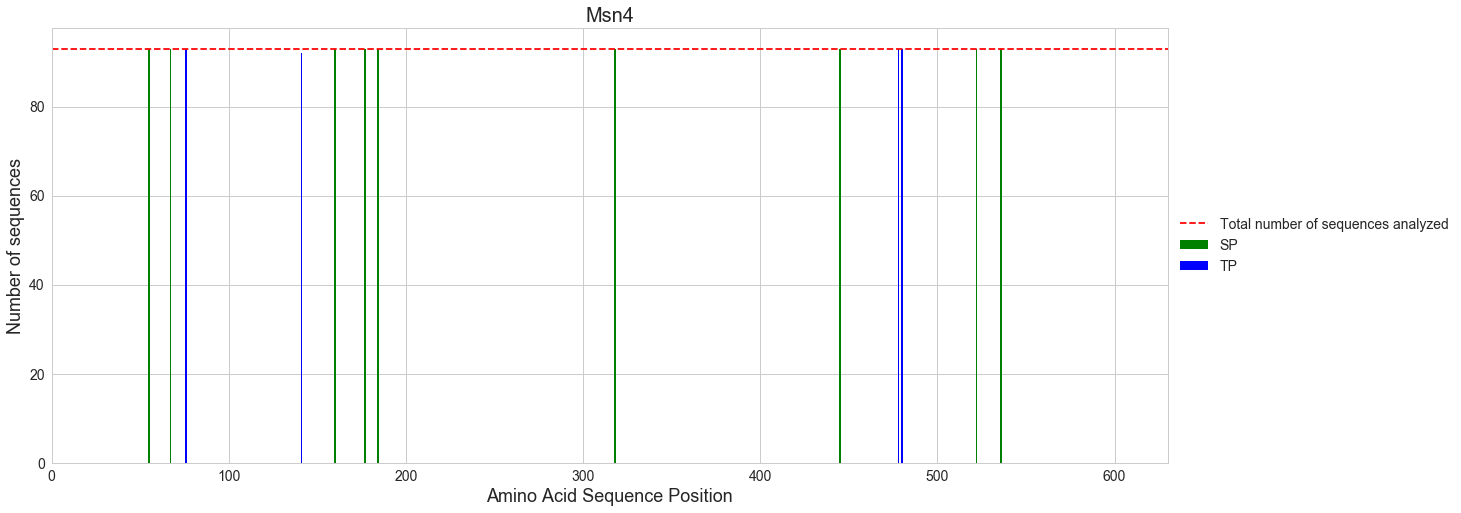

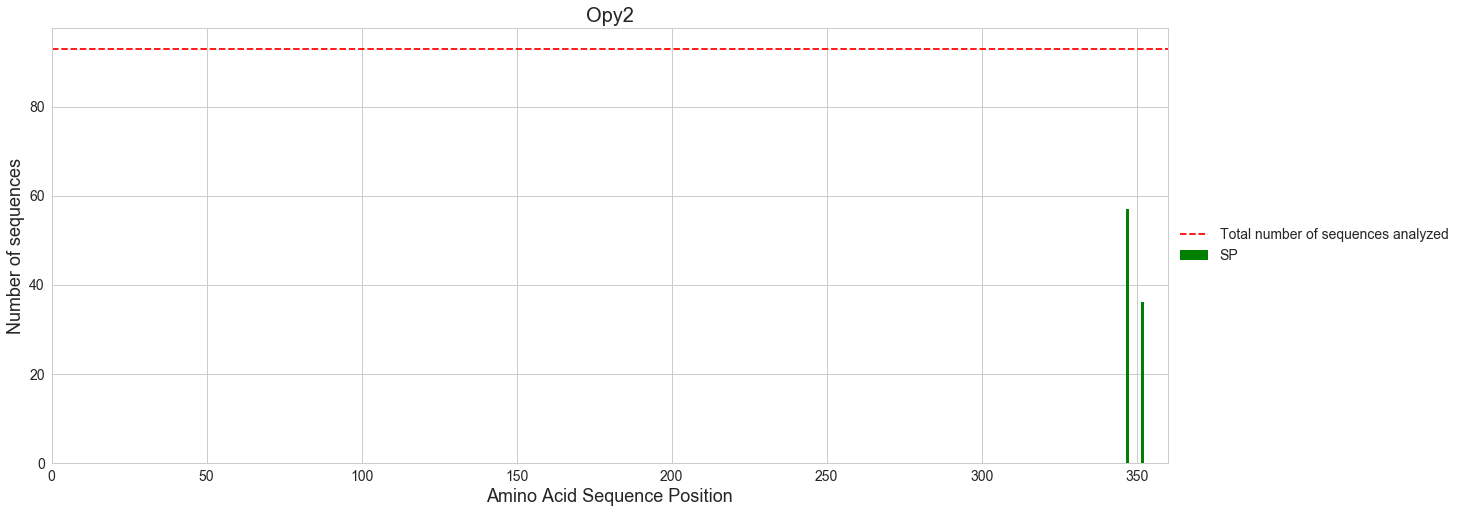

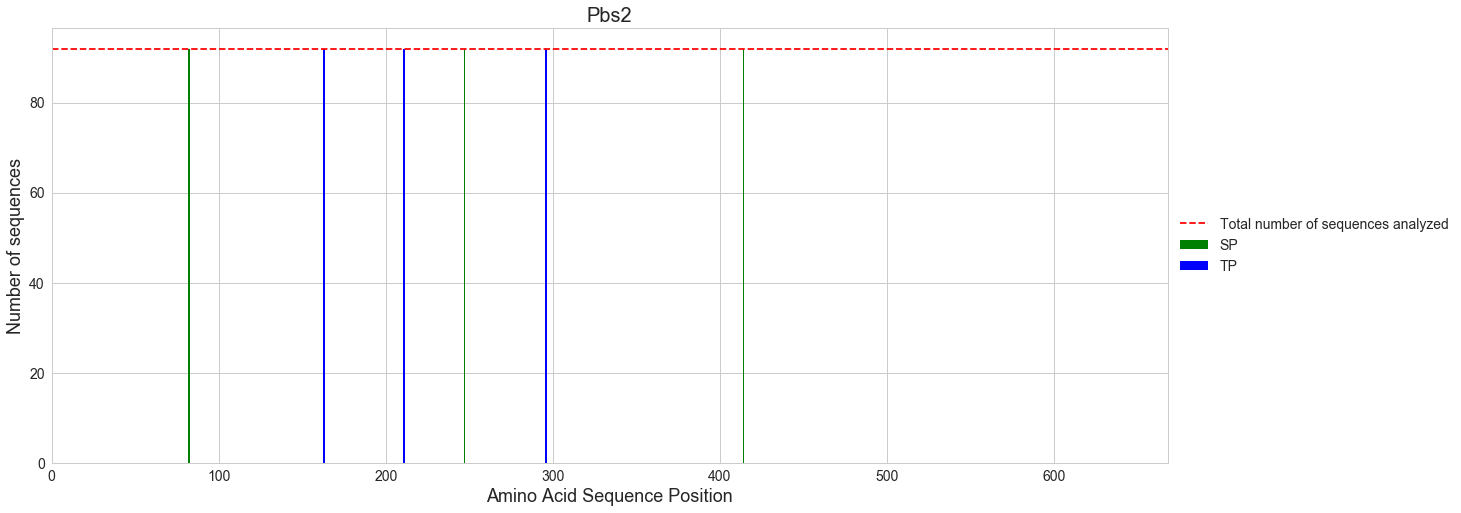

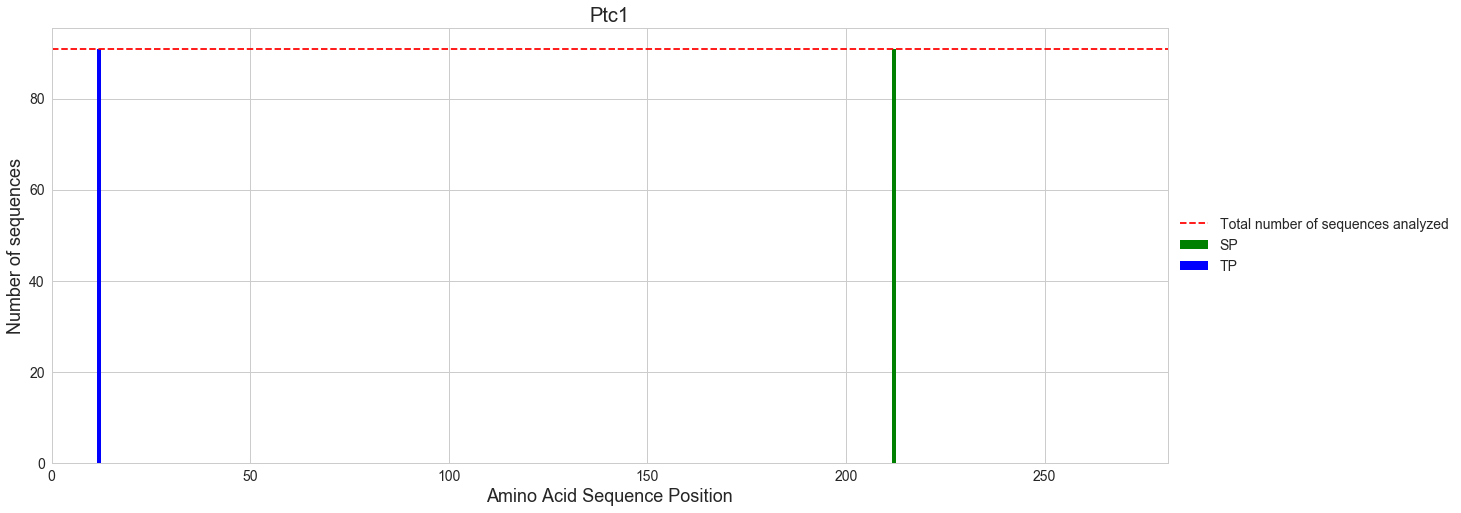

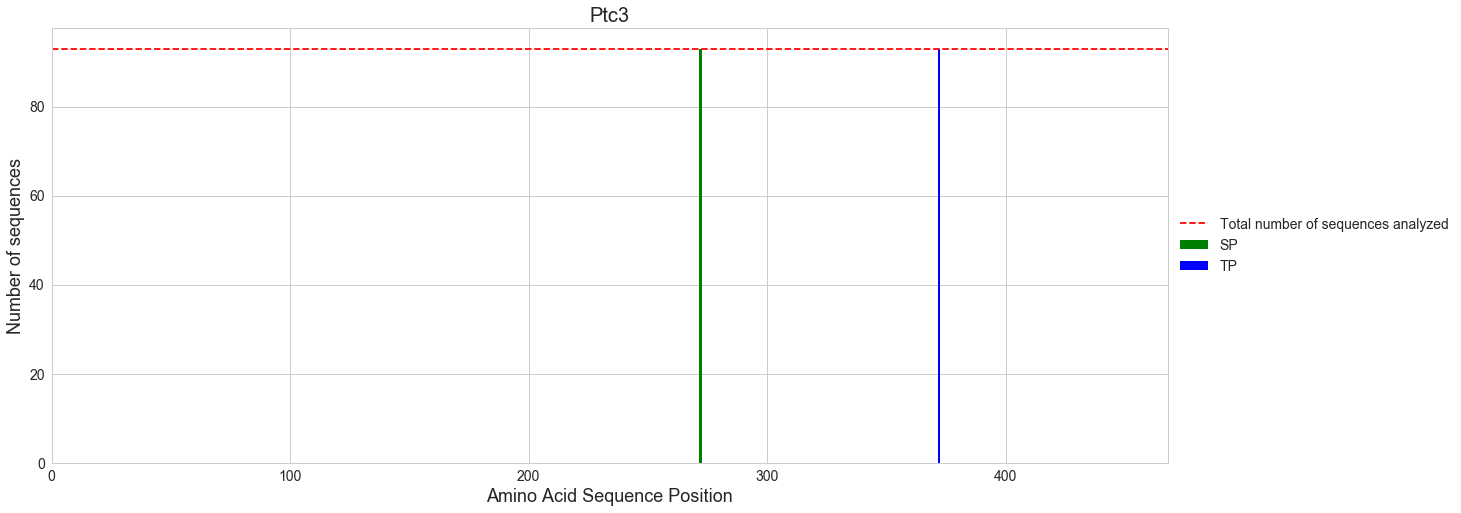

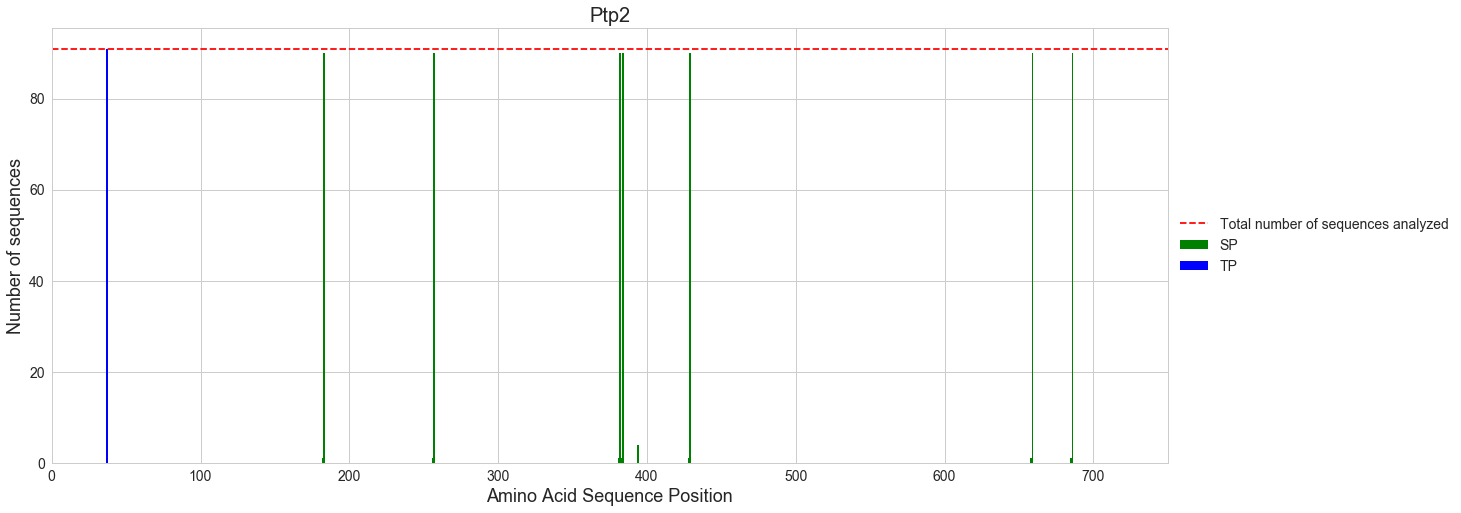

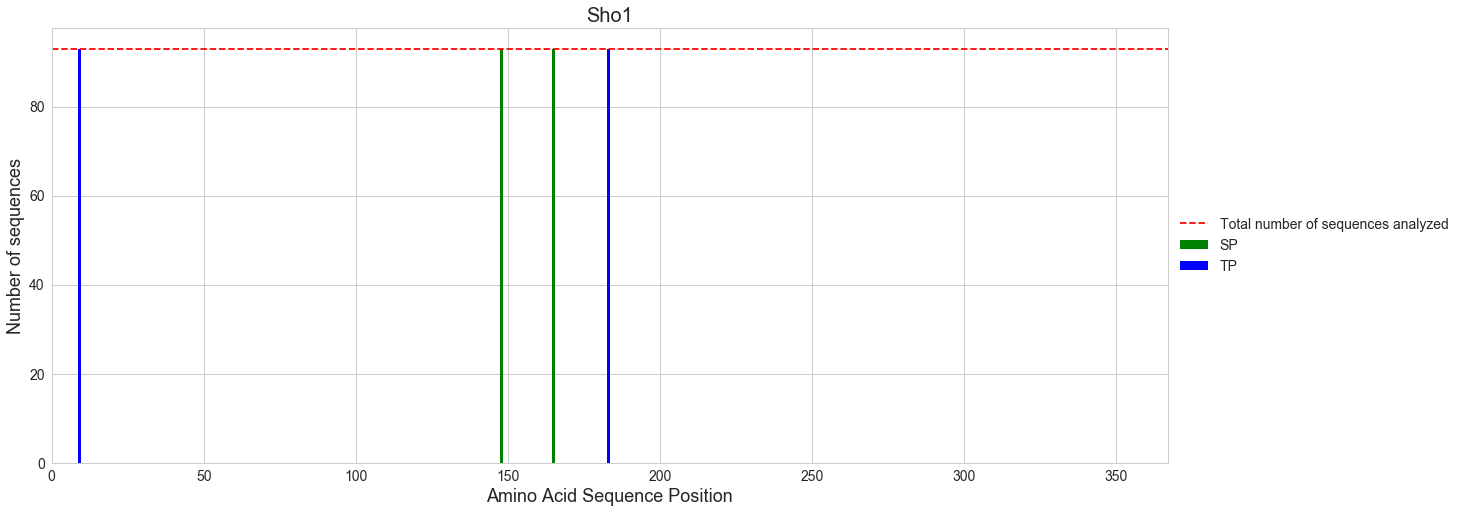

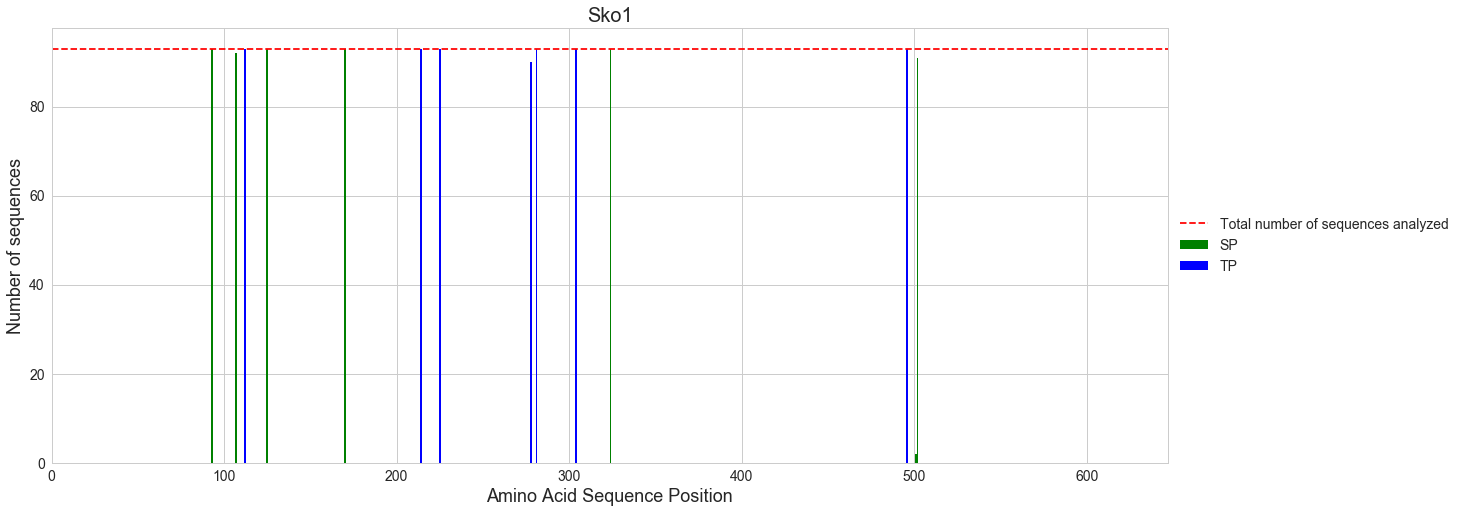

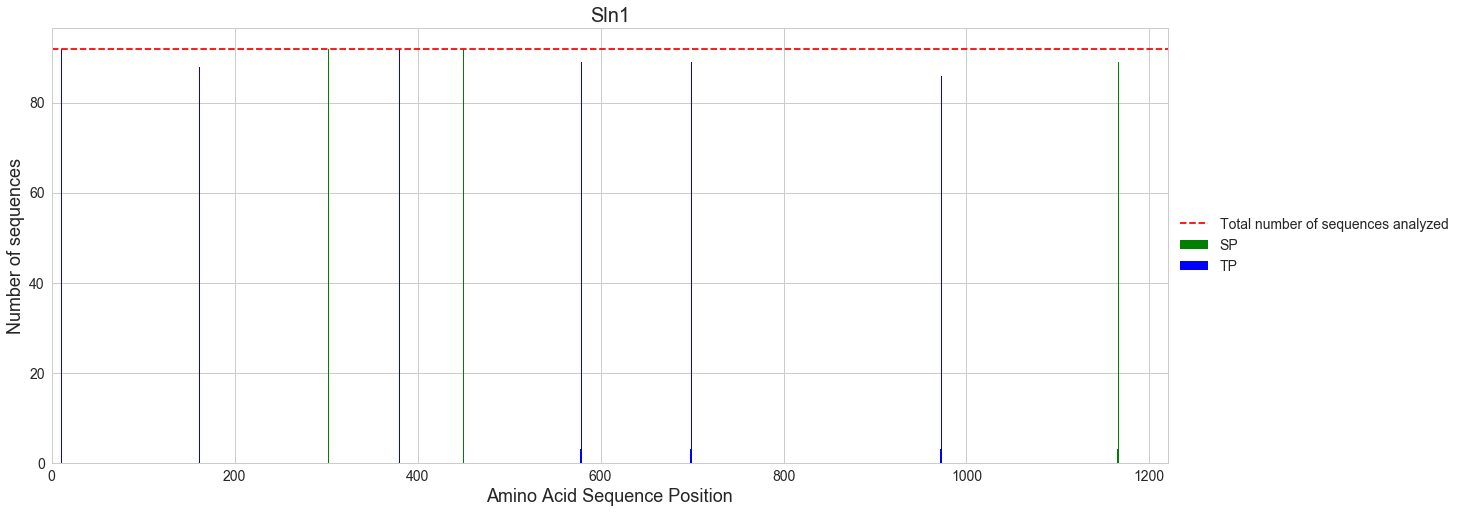

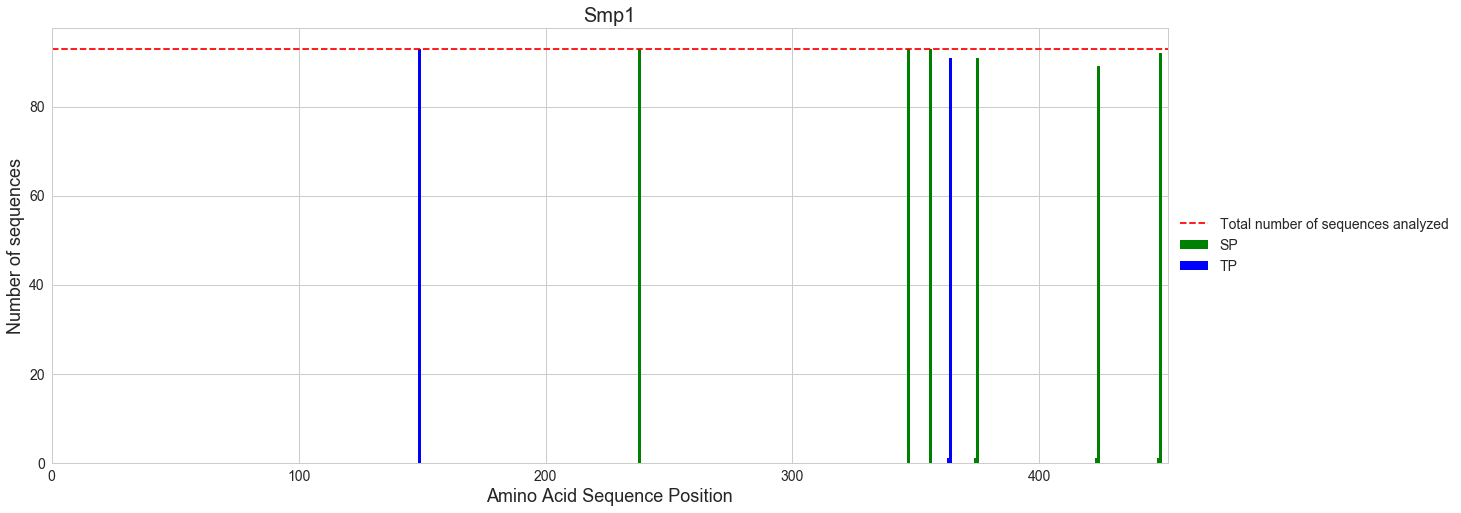

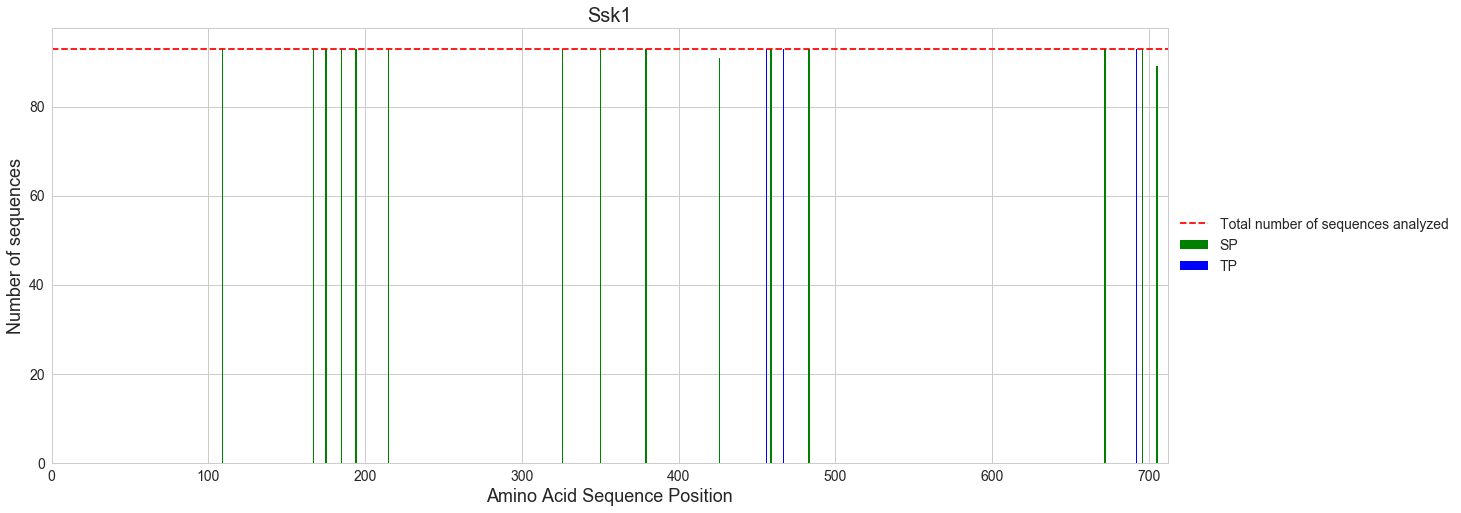

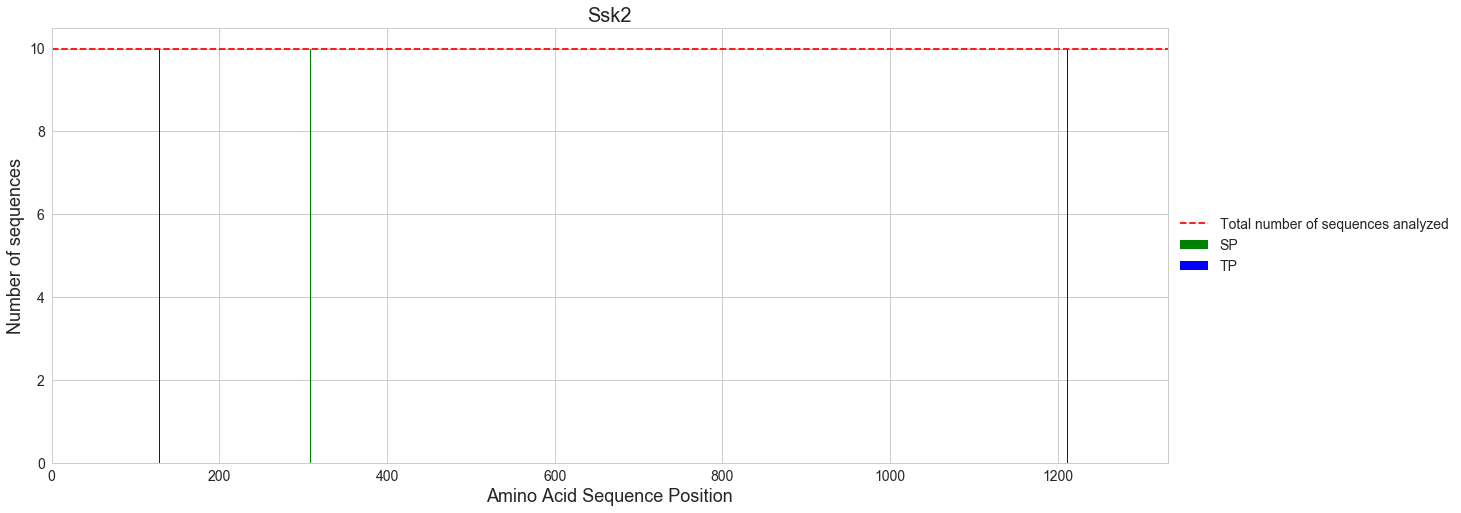

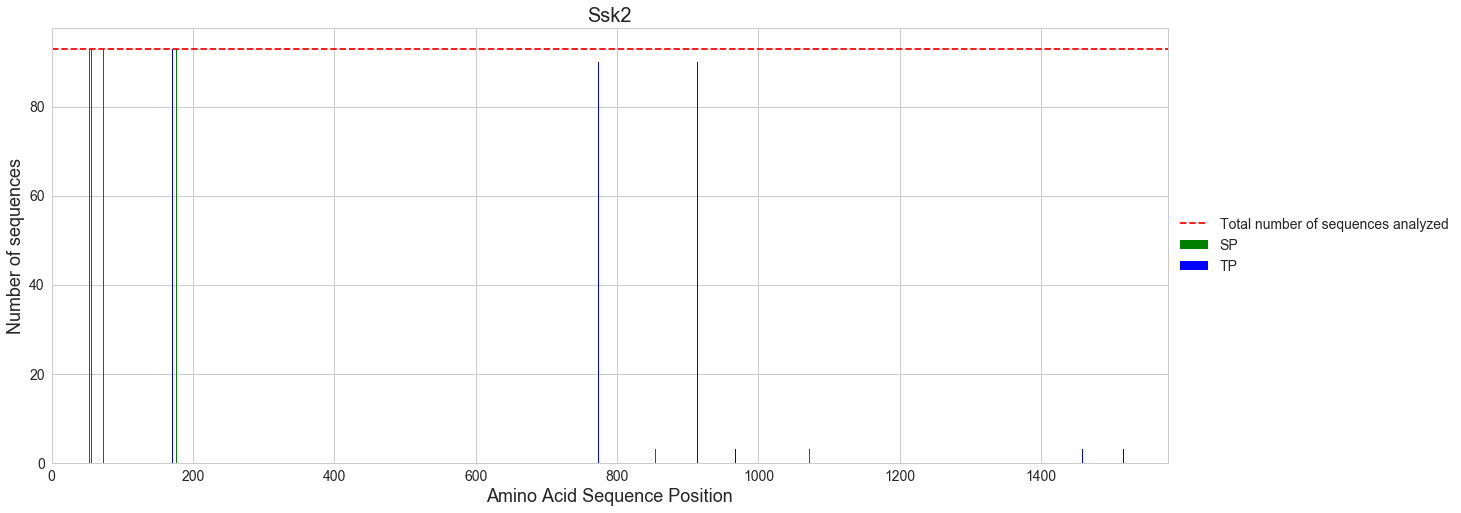

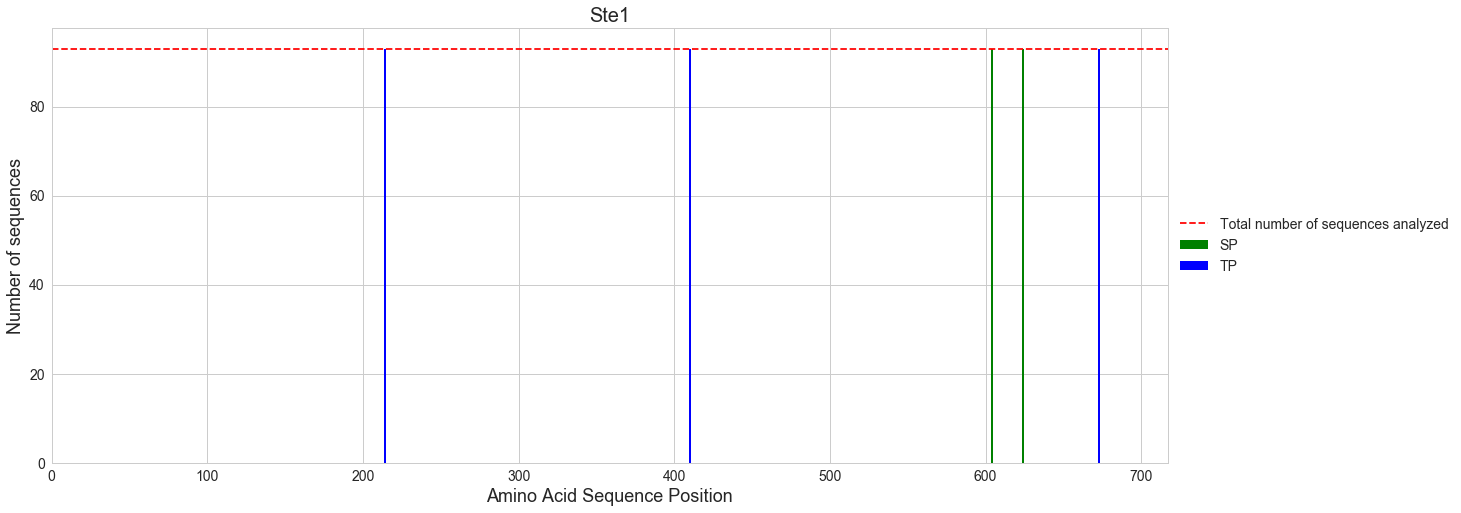

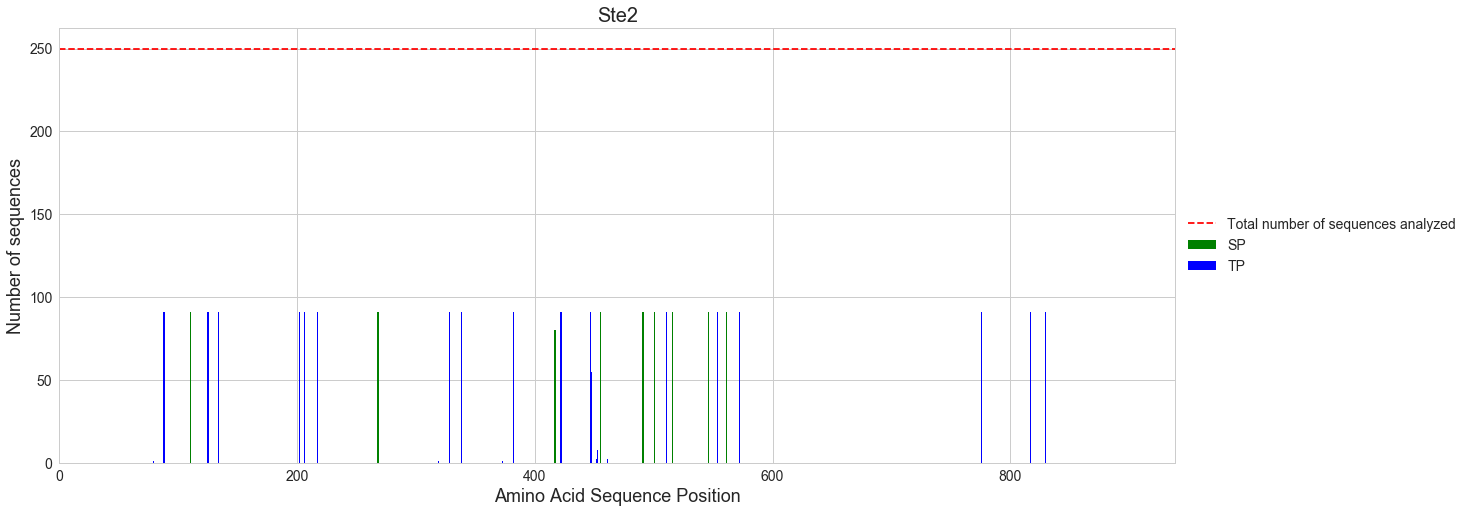

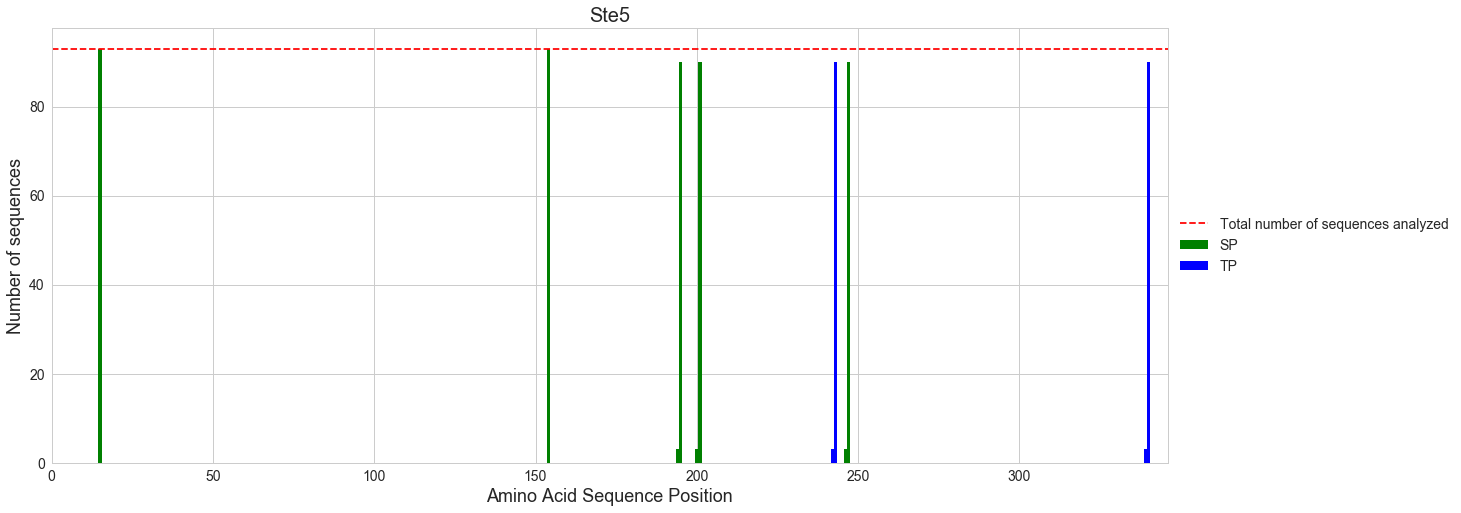

Bug in code


In [11]:
directory = 'C:/Users/sksuzuki/Documents/Research/Thesis/hog1_consensus_site_muts/aligned_cp_for_counting/trimmed_data/'
for f in os.listdir(directory):
    if f.endswith(".txt"): 
        filename = os.path.join(directory, f)
#         print(filename)
        seqs = get_ref_and_align(filename) 
        compare_concensus_sites(seqs,f)

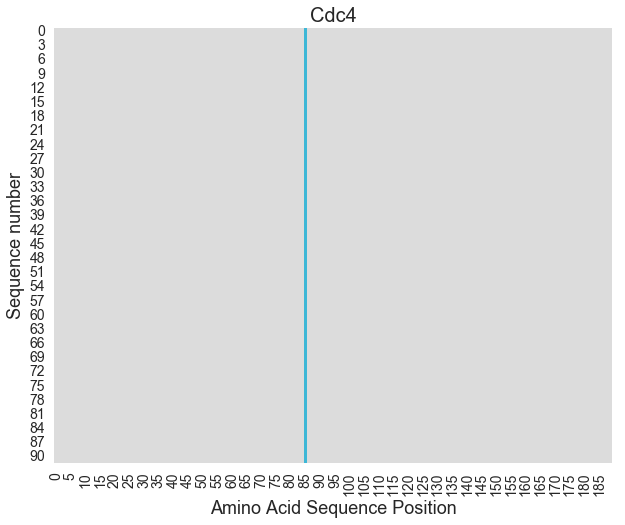

KeyboardInterrupt: 

In [15]:
directory = 'C:/Users/sksuzuki/Documents/Research/Thesis/hog1_consensus_site_muts/aligned_cp_for_counting/trimmed_data/'
for f in os.listdir(directory):
    if f.endswith(".txt"): 
        filename = os.path.join(directory, f)
#         print(filename)
        seqs = get_ref_and_align(filename) 
        plot_seq_MCS(seqs,f)

# tseqs = [test_seqs[0]] + test_seqs[1]
# len(tseqs)
# t_mcs = [x for x[i+i+1] in tseqs[0] for i in len(x-1) ]

grid =[]
for x in tseqs:
    temp = []
    for i in range(len(x)-1):
    #     print(x[i:i+2])
        if x[i:i+2] == 'SP':
            temp.append(2)
        elif x[i:i+2] == 'TP':
            temp.append(1)
        else:
            temp.append(0)
    grid.append(temp)
    
# print(len(grid))

colors = ['#DCDCDC','#ee9537','#3db7d6']

# pal = sns.set_palette(colors)

grid_df = pd.DataFrame(grid)
plt.rcParams['figure.figsize'] = [30.0, 20.0]
sns.heatmap(grid_df, cmap=colors, cbar=False)
# grid_df.head()

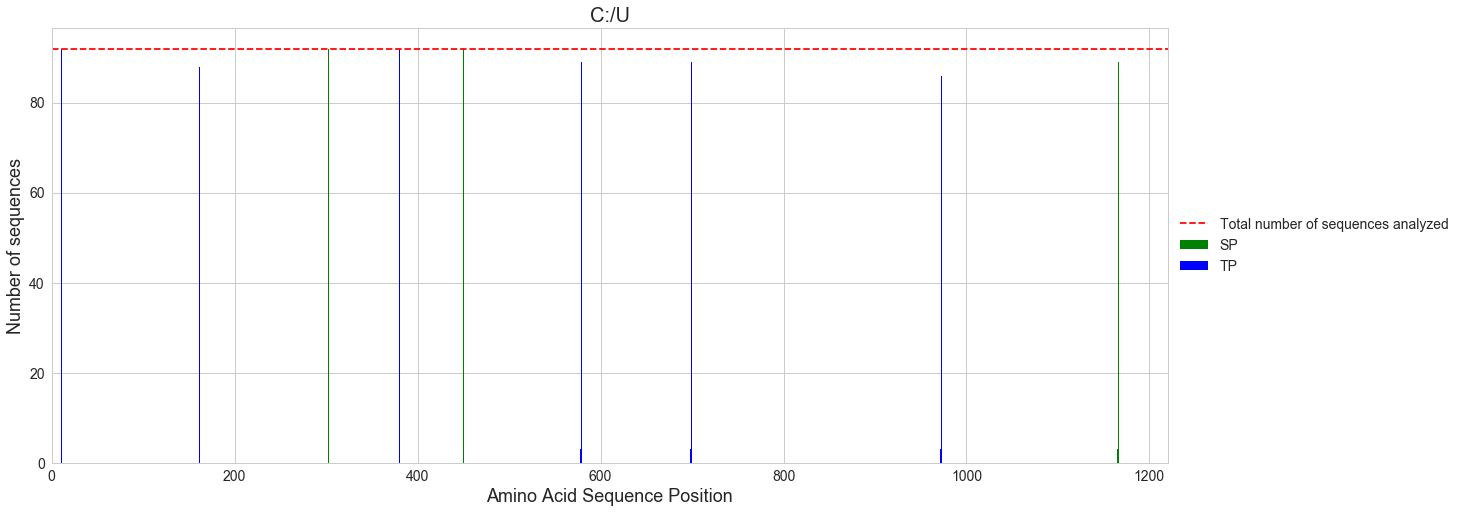

In [44]:
test_seqs = get_ref_and_align(test_filename)
compare_concensus_sites(test_seqs,test_filename)

In [494]:
sp, tp = find_concensus_site(seqs[0])
print(seqs[0])
print(sp)
print(tp)

# Test code
for j in sp:
    print(seqs[0][j:j+2])
for j in tp:
    print(seqs[0][j:j+2])

MEDKFANLSLHEKTGKSSIQLNEQTGSDNGSAVKRTSSTSSHYNNINADLHARVKAFQEQRALKRSASVGSNQSEQDKGSSQSPKHIQQIVNKPLPPLPVAGSSKVSQRMSSQVVQASSKSTLKNVLDNQETQNITDVNINIDTTKITATTIGVNTGLPATDITPSVSNTASATHKAQLLNPNRRAPRRPLSTQHPTRPNVAPHKAPAIINTPKQSLSARRGLKLPPGGMSLKMPTKTAQQPQQFAPSPSNKKHIETLSNSKVVEGKRSNPGSLINGVQSTSTSSSTEGPHDTVGTTPRTGNSNNSSNSGSSGGGGLFANFSKYVDIKSGSLNFAGKLSLSSKGIDFSNGSSSRITLDELEFLDELGHGNYGNVSKVLHKPTNVIMATKEVRLELDEAKFRQILMELEVLHKCNSPYIVDFYGAFFIEGAVYMCMEYMDGGSLDKIYDESSEIGGIDEPQLAFIANAVIHGLKELKEQHNIIHRDVKPTNILCSANQGTVKLCDFGVSGNLVASLAKTNIGCQSYMAPERIKSLNPDRATYTVQSDIWSLGLSILEMALGRYPYPPETYDNIFSQLSAIVDGPPPRLPSDKFSSDAQDFVSLCLQKIPERRPTYAALTEHPWLVKYRNQDVHMSEYITERLERRNKILRERGENGLSKNVPALHMGGL
[82, 247, 414]
[163, 211, 296]
SP
SP
SP
TP
TP
TP


In [454]:
for seq in aligns:
    sp, tp = compare_concensus_sites(seq)
    print(tp)

   locations type
0         82   SP
1        247   SP
2        414   SP
3        163   TP
4        211   TP
5        296   TP
   locations type
0         82   SP
1        247   SP
2        414   SP
3        163   TP
4        211   TP
5        296   TP
   locations type
0         82   SP
1        247   SP
2        414   SP
3        163   TP
4        211   TP
5        296   TP
   locations type
0         82   SP
1        247   SP
2        414   SP
3        163   TP
4        211   TP
5        296   TP
   locations type
0         82   SP
1        247   SP
2        414   SP
3        163   TP
4        211   TP
5        296   TP
   locations type
0         82   SP
1        247   SP
2        414   SP
3        163   TP
4        211   TP
5        296   TP
   locations type
0         82   SP
1        247   SP
2        414   SP
3        163   TP
4        211   TP
5        296   TP
   locations type
0         82   SP
1        247   SP
2        414   SP
3        163   TP
4        211   TP
5        2

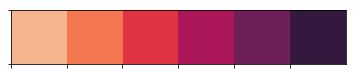

In [417]:
%matplotlib inline
import seaborn as sns
color_palette = sns.color_palette("rocket", 6)
sns.palplot(color_palette[::-1])
# sns.palplot(color_palette)
